In [883]:
# Min-max normalization
import pandas as pd
import numpy as np
df=pd.read_csv("/Users/jaeeponde/IML_A1/IML_A1/Regression_Task/data/training_data.csv")
df


# Display the normalized dataframe

,MAKE,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,COEMISSIONS,FUEL_X,FUEL_Z,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_M5,FUEL CONSUMPTION
0,3.00,3.08,2.0,4,228,1,0,0,0,1,11.2
1,4.75,4.34,4.7,8,382,1,0,0,0,1,18.8
2,4.50,4.34,4.8,8,373,1,0,0,0,1,18.9
3,4.00,4.34,4.6,8,380,1,0,1,0,0,18.5
4,4.00,4.34,4.2,6,359,1,0,1,0,0,17.3
...,...,...,...,...,...,...,...,...,...,...,...
506,3.75,4.50,4.3,6,350,1,0,1,0,0,17.0
507,3.75,4.34,4.3,6,386,1,0,0,0,1,18.7
508,4.00,3.42,3.0,6,267,1,0,1,0,0,13.6
509,3.50,3.02,2.3,4,246,0,1,0,0,1,12.6


In [884]:
df

,MAKE,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,COEMISSIONS,FUEL_X,FUEL_Z,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_M5,FUEL CONSUMPTION
0,3.00,3.08,2.0,4,228,1,0,0,0,1,11.2
1,4.75,4.34,4.7,8,382,1,0,0,0,1,18.8
2,4.50,4.34,4.8,8,373,1,0,0,0,1,18.9
3,4.00,4.34,4.6,8,380,1,0,1,0,0,18.5
4,4.00,4.34,4.2,6,359,1,0,1,0,0,17.3
...,...,...,...,...,...,...,...,...,...,...,...
506,3.75,4.50,4.3,6,350,1,0,1,0,0,17.0
507,3.75,4.34,4.3,6,386,1,0,0,0,1,18.7
508,4.00,3.42,3.0,6,267,1,0,1,0,0,13.6
509,3.50,3.02,2.3,4,246,0,1,0,0,1,12.6


In [885]:
df_train=df.drop(columns=['FUEL CONSUMPTION'])

In [886]:
df_normalized = (df_train - df_train.min()) / (df_train.max() - df_train.min())

In [887]:
df_normalized['FUEL CONSUMPTION'] = df['FUEL CONSUMPTION'].values
df_normalized

,MAKE,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,COEMISSIONS,FUEL_X,FUEL_Z,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_M5,FUEL CONSUMPTION
0,0.071429,0.048913,0.142857,0.111111,0.317136,1.0,0.0,0.0,0.0,1.0,11.2
1,0.571429,0.733696,0.528571,0.555556,0.710997,1.0,0.0,0.0,0.0,1.0,18.8
2,0.500000,0.733696,0.542857,0.555556,0.687980,1.0,0.0,0.0,0.0,1.0,18.9
3,0.357143,0.733696,0.514286,0.555556,0.705882,1.0,0.0,1.0,0.0,0.0,18.5
4,0.357143,0.733696,0.457143,0.333333,0.652174,1.0,0.0,1.0,0.0,0.0,17.3
...,...,...,...,...,...,...,...,...,...,...,...
506,0.285714,0.820652,0.471429,0.333333,0.629156,1.0,0.0,1.0,0.0,0.0,17.0
507,0.285714,0.733696,0.471429,0.333333,0.721228,1.0,0.0,0.0,0.0,1.0,18.7
508,0.357143,0.233696,0.285714,0.333333,0.416880,1.0,0.0,1.0,0.0,0.0,13.6
509,0.214286,0.016304,0.185714,0.111111,0.363171,0.0,1.0,0.0,0.0,1.0,12.6


In [888]:

# Shuffle the data and reset the index
df_shuffled = df_normalized.sample(frac=1).reset_index(drop=True)

# Define train-test split
train_size = 511 - 50  # 461 for training
train_data = df_shuffled.iloc[:train_size]  # Training data
test_data = df_shuffled.iloc[train_size:]   # Test data


# Extract features and target
X_train = train_data.drop(columns='FUEL CONSUMPTION').values
y_train = train_data['FUEL CONSUMPTION'].values
X_test = test_data.drop(columns='FUEL CONSUMPTION').values
y_test = test_data['FUEL CONSUMPTION'].values

In [889]:
import numpy as np
X_train_biased = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_biased = np.c_[np.ones(X_test.shape[0]), X_test]

In [890]:
X_train_biased

array([[1.        , 0.14285714, 0.04891304, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.14285714, 0.01630435, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.28571429, 0.54891304, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.21428571, 0.23369565, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.01630435, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.54891304, ..., 0.        , 0.        ,
        1.        ]])

In [891]:
y_train

array([11.8, 12.5, 11.7, 11.7, 10.2, 19.6, 14.3, 10.5, 13.5, 11.2, 17.6,
       12.7, 13.1, 15.7, 16.3, 15. , 12.5, 16.5, 16.1, 13.3, 18.3, 14.5,
       16.6, 15.3, 15. , 21.1, 11.9, 11.9, 12.5, 16.7, 21.4, 11.6, 14.9,
       17.3, 11.9, 17.9, 22.3, 15. , 18.7, 10.9, 10.6, 15.7, 11.9, 20.8,
        9.8, 20.2,  8.8, 16.7, 13.1, 12.2, 16. , 20.7,  9.6, 16.2, 14.7,
       11.3, 13.9, 17.4, 16.1, 16.3, 18.5, 17. , 14. , 18.8, 16.8, 12.6,
       16.8, 15.7, 16. , 12.1, 11.8, 10.5, 11.1, 13.9, 12.5, 15.5, 15.2,
       17.7, 15.9, 15.2, 14.7, 18.9, 17.7, 15.7, 14.5, 11.9, 13.8, 18.9,
       12.6, 19.6, 16. ,  7.1, 13.6, 13.3, 11.4, 12.2, 15.5, 17.3, 17.8,
       13.1, 14.2,  8.6, 14.4, 16.6,  8.2, 18.2,  7.1, 15.2, 14.2, 12.2,
       13.4, 16.2, 11.2,  9.8, 17.1, 19.1, 17.7, 12.1, 15.1, 16.2, 16.3,
       14. , 11.8, 16.8, 17.6, 13.6, 14.3, 10.3, 12.8, 12.5, 17.3, 15.4,
       13.1, 10.5, 14.9, 11.7, 12.2, 19.6, 14.2,  7.6, 12. , 17.3, 12.3,
       13.4, 18.5,  9.3,  9.3, 21.4, 11.9, 16.8, 17

In [892]:
weights = np.full(X_train.shape[1], 4.5)  # Random initialization
learning_rate = 0.5  # Set your learning rate
n_iterations = 1000  # Number of iterations for gradient descent

In [893]:
weights

array([4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5])

In [894]:
def gradient_descent(X, y, weights, learning_rate, n_iterations):
    n_samples = len(y)

    for _ in range(n_iterations):
        
        # Compute the predictions
        predictions = X.dot(weights)
        
        # Compute the gradient
        gradients = (2/n_samples) * X.T.dot(predictions - y)
        
        # Update the weights
        weights -= learning_rate * gradients

        print("current weights \n")
        print(weights)
        
    return weights

In [895]:
weights = gradient_descent(X_train, y_train, weights, learning_rate, n_iterations)


current weights 

[3.94696921 3.55922824 3.82801393 3.87581113 3.56196174 2.83919878
 4.33001577 3.33534458 4.31860555 3.83863598]
current weights 

[4.35649676 4.10820164 4.34174866 4.35263101 4.39055341 4.12457857
 4.61729983 4.25370519 4.33198551 4.16988103]
current weights 

[4.03400541 3.53398436 3.95170571 3.98807872 3.87481722 3.19588622
 4.53148928 3.55983309 4.19427055 3.78748876]
current weights 

[4.26551583 3.81815073 4.24433678 4.25756104 4.37542549 3.95790994
 4.70997489 4.06712459 4.17053373 3.97000877]
current weights 

[4.07654886 3.45814306 4.01796506 4.04394257 4.10347708 3.44473466
 4.67458312 3.64952778 4.06148797 3.73860346]
current weights 

[4.20640077 3.5931133  4.18453701 4.19529638 4.41611056 3.90210441
 4.79132244 3.92376388 4.01924808 3.82975767]
current weights 

[4.09470719 3.35901527 4.05300416 4.06916629 4.28467781 3.62515392
 4.78497881 3.66692143 3.92902942 3.68154324]
current weights 

[4.16647795 3.41070327 4.14760789 4.15306074 4.48940804 3.9053614

In [896]:
def predict(X, weights):
    return X.dot(weights)

# Predictions
y_train_pred = predict(X_train, weights)
y_test_pred = predict(X_test, weights)

In [897]:
# Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Root Mean Squared Error (RMSE)
def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

# R-squared (R²) score
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


In [898]:
# Function to print metrics for both train and test
def print_train_test_metrics(y_train, y_train_pred, y_test, y_test_pred):
    # Training metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = root_mean_squared_error(y_train, y_train_pred)
    train_r2 = r_squared(y_train, y_train_pred)

    # Print training metrics
    print(f'Training Mean Squared Error (MSE): {train_mse:.4f}')
    print(f'Training Root Mean Squared Error (RMSE): {train_rmse:.4f}')
    print(f'Training R-squared (R²) Score: {train_r2:.4f} \n')

    # Testing metrics
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)
    test_r2 = r_squared(y_test, y_test_pred)

    # Print testing metrics
    print(f'Testing Mean Squared Error (MSE): {test_mse:.4f}')
    print(f'Testing Root Mean Squared Error (RMSE): {test_rmse:.4f}')
    print(f'Testing R-squared (R²) Score: {test_r2:.4f}')

# Example usage
# print_train_test_metrics(y_train, y_train_pred, y_test, y_test_pred)

In [899]:
print_train_test_metrics(y_train, y_train_pred, y_test, y_test_pred)

Training Mean Squared Error (MSE): 0.7839
Training Root Mean Squared Error (RMSE): 0.8854
Training R-squared (R²) Score: 0.9186 

Testing Mean Squared Error (MSE): 0.4505
Testing Root Mean Squared Error (RMSE): 0.6712
Testing R-squared (R²) Score: 0.9661


In [900]:
import pandas as pd

# Assuming y_train, y_train_pred, y_test, and y_test_pred are NumPy arrays

# Create a DataFrame for training data comparison
df_train_comparison = pd.DataFrame({
    'y_train_actual': y_train,
    'y_train_predicted': y_train_pred
})



# Optionally, display them side by side (optional, can display each separately as well)
print("Training Data Comparison:")
df_train_comparison

Training Data Comparison:


,y_train_actual,y_train_predicted
0,11.8,11.818154
1,12.5,12.317366
2,11.7,12.136121
3,11.7,11.712835
4,10.2,10.549923
...,...,...
456,16.3,16.940407
457,24.1,23.793988
458,13.7,14.102742
459,4.9,4.728372


In [901]:
import pandas as pd

# Assuming y_train, y_train_pred, y_test, and y_test_pred are NumPy arrays


# Create a DataFrame for testing data comparison
df_test_comparison = pd.DataFrame({
    'y_test_actual': y_test,
    'y_test_predicted': y_test_pred
})

# Optionally, display them side by side (optional, can display each separately as well)
print("Testing Data Comparison:")
df_test_comparison

Testing Data Comparison:


,y_test_actual,y_test_predicted
0,13.2,12.997085
1,16.4,16.458394
2,13.2,13.381091
3,14.7,15.437152
4,10.6,9.968316
5,21.4,21.616253
6,10.6,11.085502
7,14.7,15.546957
8,12.2,12.200181
9,16.6,16.921165


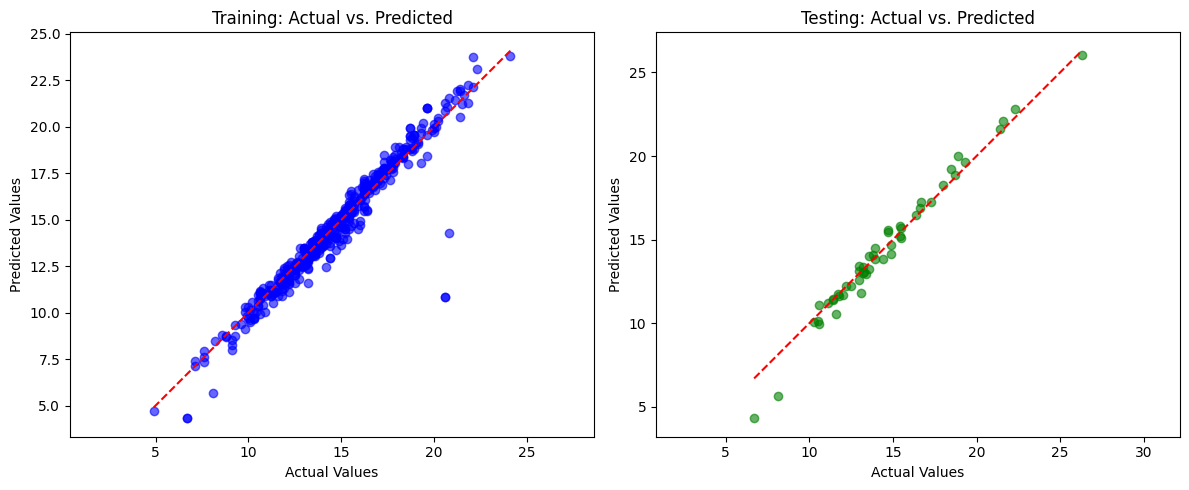

In [902]:
# Scatter plot for actual vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training: Actual vs. Predicted')
plt.axis('equal')

# Testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Testing: Actual vs. Predicted')
plt.axis('equal')

plt.tight_layout()
plt.show()